<a href="https://colab.research.google.com/github/hajonghyun/installPytorch_study/blob/main/1_torch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

## `torch.tensor` vs `np.array` 핵심 비교

AI 엔지니어링, 특히 딥러닝 학습 단계로 넘어갈 때 가장 명확하게 이해해야 하는 두 자료형의 차이점입니다.

### 1. 요약 표

| 비교 항목 | NumPy (`np.array`) | PyTorch (`torch.tensor`) |
| :--- | :--- | :--- |
| **주 용도** | 일반 수치 계산, 데이터 전처리, 머신러닝(Scikit-learn) | **딥러닝 모델 학습**, GPU 가속 연산 |
| **하드웨어** | **CPU** 연산만 가능 | **CPU + GPU** 연산 지원 (`.to('cuda')`) |
| **미분(Gradient)** | 지원 안 함 (수식 직접 구현 필요) | **Autograd** (자동 미분) 지원 (`requires_grad=True`) |
| **메모리 공유** | `from_numpy()` 사용 시 메모리 공유 가능 | `torch.as_tensor()` 등으로 효율적 변환 가능 |

---

### 2. 주요 차이점 상세

#### A. GPU 가속 (Hardware Acceleration)
**가장 큰 차이점**입니다. NumPy는 CPU에서만 작동하지만, Tensor는 GPU로 데이터를 옮겨 대규모 병렬 연산(행렬 곱 등)을 빠르게 처리할 수 있습니다.

```python
import torch
import numpy as np

# NumPy: 오직 CPU 메모리 사용
arr = np.array([1, 2, 3])

# PyTorch: GPU로 이동 가능
tensor = torch.tensor([1, 2, 3])
if torch.cuda.is_available():
    tensor = tensor.to('cuda') # 데이터를 GPU VRAM에 올림
```

#### B. 자동 미분 (Autograd)
딥러닝의 핵심인 **역전파(Backpropagation)**를 수행하기 위해, PyTorch Tensor는 연산의 히스토리를 추적하고 미분값을 저장할 수 있습니다.

```python
# requires_grad=True: 이 텐서에 대한 연산을 추적하겠다는 의미
w = torch.tensor(2.0, requires_grad=True)

y = w ** 2      # 수식: y = w^2
y.backward()    # 미분 수행 (dy/dw)

print(w.grad)   # 결과: 4.0 (2 * w)
```
* **NumPy**는 단순히 값을 저장하고 계산할 뿐, 미분 계수(`grad`)를 자동으로 계산해주지 않습니다.

### 3. 결론 (AI 엔지니어 관점)
* **데이터 전처리/분석 단계:** `np.array`와 Pandas를 주로 사용합니다.
* **모델 학습/추론 단계:** 데이터를 `torch.tensor`로 변환하여 GPU에 올리고 모델에 주입합니다.

In [ ]:
np.array([1,2,3])

array([1, 2, 3])

In [ ]:
torch.tensor([1,2,3])

tensor([1, 2, 3])

## `type()` vs `.dtype` 차이점 정리

파이썬으로 데이터 사이언스나 딥러닝을 할 때, **디버깅(에러 해결)의 80%는 이 두 가지를 구분하는 것**에서 시작됩니다.

### 1. 핵심 요약

| 구분 | 명령어 예시 | 설명 | 비유 (컵과 내용물) |
| :--- | :--- | :--- | :--- |
| **`type()`** | `type(data)` | **객체(컨테이너) 자체의 자료형**을 확인합니다.<br>(예: 이것은 리스트인가? 텐서인가?) | **"이 컵은 유리컵인가, 머그컵인가?"** |
| **`.dtype`** | `data.dtype` | **객체 안에 담긴 데이터(원소)의 자료형**을 확인합니다.<br>(예: 텐서 안에 들어있는 숫자가 `int`인가 `float`인가?) | **"컵 안에 든 것이 물인가, 콜라인가?"** |

---

### 2. 코드 예시 (PyTorch & NumPy)

가장 흔히 혼동하는 상황을 코드로 확인해 보세요.

```python
import torch
import numpy as np

# 데이터 생성
np_arr = np.array([1.0, 2.0, 3.0])
torch_tensor = torch.tensor([1, 2, 3]) # 정수로 생성

# 1. type(): 껍데기 확인
print(type(np_arr))       # <class 'numpy.ndarray'> -> "이것은 넘파이 배열입니다."
print(type(torch_tensor)) # <class 'torch.Tensor'>  -> "이것은 파이토치 텐서입니다."

# 2. .dtype: 내용물 확인 (매우 중요!)
print(np_arr.dtype)       # float64 -> "안에 실수가 들어있습니다."
print(torch_tensor.dtype) # torch.int64 -> "안에 정수가 들어있습니다."
```

### 3. 왜 중요한가요? (AI 엔지니어 관점)

* **`type()` 에러:** 주로 **호환성** 문제입니다.
    * *예: PyTorch 모델에 실수로 NumPy 배열을 넣으면 `TypeError`가 발생합니다.*
* **`.dtype` 에러:** 주로 **정밀도나 연산** 문제입니다.
    * *예: 딥러닝 모델 가중치는 보통 `float32`인데, 입력 데이터가 `int64`나 `float64`면 `RuntimeError: expected scalar type Float but found Double` 같은 에러가 뜹니다.*
    * **해결:** `tensor.to(torch.float32)` 처럼 캐스팅(형변환)을 해줘야 합니다.

In [ ]:
a = torch.tensor([1,2,3])
b = torch.tensor([1.0, 2, 3]) # 하나라도 실수면 dtype은 float

In [ ]:
print(type(a), type(b))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
print(a.dtype, b.dtype)

torch.int64 torch.float32


In [ ]:
print(a.shape)

torch.Size([3])


## Tensor 핵심 속성 및 형태 규칙

### 1. 형태 규칙 (Shape Constraint)
* **직사각형 형태 강제 (Strict Rectangular):** Tensor는 GPU 병렬 연산을 위해 모든 행(Row)의 길이가 반드시 같아야 합니다.
    * `[[1, 2, 3], [4, 5]]` ❌ : **Jagged Tensor 불가** (에러 발생)
    * `[[1, 2, 3], [4, 5, 6]]` ⭕ : 생성 가능

### 2. 필수 속성 조회 3대장

딥러닝 모델 디버깅 시 `print()`로 가장 많이 찍어보는 3가지입니다.

```python
import torch

a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# 1. 모양 (Shape) - ★가장 중요★
# 각 차원의 크기를 확인 (행, 열)
print(a.shape)    # torch.Size([2, 3])

# 2. 차원 수 (Dimension/Rank)
# 몇 차원 텐서인지 확인
print(a.ndim)     # 2

# 3. 전체 원소 개수 (Number of Elements)
# 2행 * 3열 = 총 6개
print(a.numel())  # 6
```

In [ ]:
a = torch.tensor([[1,2,3],
                  [4,5,6]])
# b = torch.tensor([[1,2,3],
#                   [4,5]])
# np.array와는 달리 torch.tensor는 행렬
# 각 행에 해당하는 숫자의 개수 같아야함.

print(a.shape)
print(a.ndim) # 차원 수
print(a.numel()) # num of element 요소의 수

torch.Size([2, 3])
2
6


## Tensor 생성 및 초기화 (NumPy와 비교)

PyTorch는 NumPy와 매우 유사한 API를 제공하지만, **Shape 입력 방식**에서 더 유연합니다.

### 1. 0 또는 1로 채우기 (`zeros`, `ones`)
* **핵심 차이:** `torch`는 차원(Shape)을 튜플 `()`로 묶지 않고 **인자로 바로 나열**해도 됩니다. (NumPy는 튜플 필수)

```python
# 5행 5열 0행렬
print(torch.zeros(5, 5))  # OK: 괄호 하나로 충분
# print(np.zeros(5, 5))   # Error: np.zeros((5, 5))여야 함

# 2행 2열 1행렬
print(torch.ones(2, 2))
```

### 2. 형태 복제하기 (`_like`)
* 기존 텐서 `a`의 **Shape(모양), Dtype(자료형), Device(CPU/GPU)** 속성을 그대로 물려받아 새로운 텐서를 만듭니다.

```python
# a와 똑같은 모양으로 0을 채움
print(torch.zeros_like(a))
```

### 3. 수열 생성 (`arange`, `linspace`)
* 데이터 인덱싱이나 그래프 축(x-axis)을 만들 때 주로 사용합니다.

| 함수 | 설명 | 인자 의미 | 예시 |
| :--- | :--- | :--- | :--- |
| **`arange`** | 간격(Step) 기준 생성 | `(시작, 끝, 간격)` | `torch.arange(0, 10, 2)`<br>→ `[0, 2, 4, 6, 8]` (끝 미포함) |
| **`linspace`** | 개수(Count) 기준 생성 | `(시작, 끝, 개수)` | `torch.linspace(0, 10, 5)`<br>→ `[0, 2.5, 5, 7.5, 10]` (끝 포함) |

In [ ]:
print(torch.zeros(5,5))
print(np.zeros((5,5)))

print('\n')

print(torch.zeros_like(a))
print(np.zeros_like(a))

print('\n')

print(torch.ones(2,2))
print(np.ones((2,2)))

print('\n')

print(torch.arange(3,10,2))
print(np.arange(3,10,2))

print('\n')

print(torch.linspace(1,10,10))
print(np.linspace(1,10,10))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


tensor([[0, 0, 0],
        [0, 0, 0]])
[[0 0 0]
 [0 0 0]]


tensor([[1., 1.],
        [1., 1.]])
[[1. 1.]
 [1. 1.]]


tensor([3, 5, 7, 9])
[3 5 7 9]


tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


## Tensor 기본 연산 (Element-wise vs Dot Product)

PyTorch 연산에서 가장 중요한 것은 **`*` (단순 곱)**과 **`@` (행렬 곱)**을 구분하는 것입니다.

### 1. 원소별 연산 (Element-wise)
기본 산술 연산자(`+`, `-`, `*`, `/`, `**`)는 **같은 위치(Index)에 있는 원소끼리** 1:1로 계산합니다. 결과의 모양(Shape)이 유지됩니다.

```python
a = torch.tensor([1, 2, 3])
b = torch.tensor([3, 2, 1])

# [1*3, 2*2, 3*1]
print(a * b)   # tensor([3, 4, 3]) -> 이를 아다마르 곱(Hadamard Product)이라고도 함

# [1^2, 2^2, 3^2]
print(a ** 2)  # tensor([1, 4, 9])
```

### 2. 내적 / 행렬 곱 (Dot Product)
**`@` 연산자**는 벡터의 내적(Inner Product) 또는 행렬 곱셈을 수행합니다. 1차원 벡터끼리 연산하면 결과가 하나의 값(Scalar)으로 합쳐집니다.

```python
# 계산 과정: (1*3) + (2*2) + (3*1) = 3 + 4 + 3 = 10
print(a @ b)   # tensor(10)
```

> **Tip:** 과거에는 `torch.matmul(a, b)`를 많이 썼지만, 최신 코드에서는 가독성을 위해 **`a @ b`**를 더 선호합니다.

In [ ]:
a = torch.tensor([1,2,3])
b = torch.tensor([3,2,1])
print(a+b)
print(a*b) #
print(a@b) #

print(a/b)
print(a**2)  # 제곱도 각 성분에 대해서.

tensor([4, 4, 4])
tensor([3, 4, 3])
tensor(10)
tensor([0.3333, 1.0000, 3.0000])
tensor([1, 4, 9])


## pytorch의 인덱싱과 슬라이싱
--> numpy, list와 똑같음.

In [ ]:
a = torch.tensor([1,2,3,4,5,6,7,8,9])

print(a[7:])
print(a[2:5])
print(a[::2])
print(a[:])

tensor([8, 9])
tensor([3, 4, 5])
tensor([1, 3, 5, 7, 9])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
a = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(a[0])
print(a[-1])
print(a[1:])
print(a[:])
print(a[0][2])
print(a[0,2])   # 일반 list에서는 불가! np, torch에서만 가능

print(a[:][2]) # a[:] == a
print(a[:,2]) # 위와 결과가 다름을 알 수 있음.


tensor([1, 2, 3])
tensor([7, 8, 9])
tensor([[4, 5, 6],
        [7, 8, 9]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor(3)
tensor(3)
tensor([7, 8, 9])
tensor([3, 6, 9])


## 3차원 텐서와 차원(Shape) 규칙

### 1. 3차원 텐서 구조 해석 (`2, 3, 4`)
텐서의 Shape은 **가장 바깥쪽 대괄호부터 안쪽으로** 파고들며 해석합니다.

* `torch.Size([2, 3, 4])`
    * **2 (Depth):** 큰 덩어리(면)가 2개
    * **3 (Row):** 각 덩어리 안에 행이 3개
    * **4 (Col):** 각 행 안에 열(원소)이 4개

### 2. 대괄호와 차원의 관계 (The Bracket Rule)
**"대괄호 `[]`를 한 겹 씌울 때마다, Shape의 맨 왼쪽에 `1`이 추가됩니다."**

내용물(데이터)은 같아도, 대괄호로 감싸면 **차원(Rank)**이 높아집니다.

```python
import torch

# 1. 기본: 1차원 벡터 (요소 4개)
a = torch.tensor([1, 2, 3, 4])
print(a.shape) # torch.Size([4])

# 2. 대괄호 1겹 추가 -> 2차원 (1행 4열)
b = torch.tensor([[1, 2, 3, 4]])
print(b.shape) # torch.Size([1, 4])

# 3. 대괄호 2겹 추가 -> 3차원 (덩어리 1개, 1행 4열)
c = torch.tensor([[[1, 2, 3, 4]]])
print(c.shape) # torch.Size([1, 1, 4])

# 4. 대괄호 3겹 추가 -> 4차원
d = torch.tensor([[[[1, 2, 3, 4]]]])
print(d.shape) # torch.Size([1, 1, 1, 4])
```

> **Tip:** 이렇게 `1`인 차원이 불필요하게 생겼을 때는 **`squeeze()`** 함수로 제거할 수 있습니다.

---
# 인덱싱의 기본

### **변수 오른쪽에 []가 열리면** 뭘 하겠다는 뜻?

### ⏩ 인덱싱을 하겠다.

In [ ]:
# 3차원 행렬 인덱싱
a = torch.tensor([[[0,1,2,3],[4,5,6,7],[8,9,10,11]],
                  [[12,13,14,15],[16,17,18,19],[20,21,22,23]]])
print(a)
print(a.shape)
print(a.ndim)


# 대괄호가 하나 늘어나면 왼쪽에 shape값이 추가된다.
a = torch.tensor([[1,2,3,4]])
print(a.shape)

a = torch.tensor([[[1,2,3,4]]])
print(a.shape)

a = torch.tensor([[[[1,2,3,4]]]])
print(a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
torch.Size([2, 3, 4])
3
torch.Size([1, 4])
torch.Size([1, 1, 4])
torch.Size([1, 1, 1, 4])


# 여러번 보기

https://www.youtube.com/watch?v=Jpb7Z3w6ZmI&list=LL&index=3&t=1206s

## PyTorch 팬시 인덱싱 (Fancy Indexing)

슬라이싱(`:`)이 범위를 칼로 자르는 것이라면, 팬시 인덱싱은 **원하는 지점만 콕콕 집어내거나(Picking)** 순서를 내 마음대로 섞는 기법입니다.

## 1. 판단 기준: "이게 팬시 인덱싱인가?"
대괄호 `[]` 안에 **숫자 하나**나 **슬라이싱(`:`)**이 아닌, **또 다른 리스트(List)나 배열(Tensor)**이 들어가 있다면 팬시 인덱싱입니다.

* `a[1:3]` : 슬라이싱 (범위)
* `a[[1, 3]]` : **팬시 인덱싱** (1번과 3번만 선택)

---

## 2. 핵심 해석법: "메인 콤마(,)의 법칙" ★★★

복잡한 대괄호 속에서 길을 잃지 않는 유일한 법칙입니다. **가장 바깥쪽 콤마**가 차원을 가르는 국경선입니다.

### Case A. 콤마가 있다? -> `a[ [0,1], [0,1] ]`
* **의미:** 차원별로 좌표를 따로 줬다는 뜻입니다.
* **해석법:** **"좌표 찍기 (Zipping)"**
    * 리스트들을 세로로 나란히 놓고 같은 순서끼리 묶어서 $(x, y)$ 좌표를 만듭니다.
    * 예: `(0,0)` 좌표의 값 하나, `(1,1)` 좌표의 값 하나.

### Case B. 콤마가 없다? -> `a[ [0,1] ]`
* **의미:** 리스트 전체가 **첫 번째 차원(Dim 0)**에 통째로 들어갔다는 뜻입니다.
* **해석법:** **"덩어리 선택 (Selection)"**
    * "0번 덩어리와 1번 덩어리를 통째로 가져와라."
    * 남은 차원은 건드리지 않았으므로 그대로 유지됩니다.

In [ ]:
a = torch.tensor([[[0,1,2,3],[4,5,6,7],[8,9,10,11]],
                  [[12,13,14,15],[16,17,18,19],[20,21,22,23]]])
print(a)
a[[0,1,1,0],[0,1,2,1],[3,3,2,1]]

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


tensor([ 3, 19, 22,  5])

### 팬시 인덱싱 점검: 4차원 텐서 퀴즈

제대로 이해했는지 확인하는 고난도 4차원 문제입니다.

### 기본 설정
0부터 15까지 숫자가 채워진 `(2, 2, 2, 2)` 텐서입니다.
```python
import torch
a = torch.arange(16).view(2, 2, 2, 2)
```



In [ ]:
# shape: (2, 2, 2, 2) -> (B, C, H, W)라고 상상해보세요.
a = torch.arange(16).view(2, 2, 2, 2)

print(a)

tensor([[[[ 0,  1],
          [ 2,  3]],

         [[ 4,  5],
          [ 6,  7]]],


        [[[ 8,  9],
          [10, 11]],

         [[12, 13],
          [14, 15]]]])


### Q1. 좌표 콕콕 찍기 (Basic)
리스트가 모든 차원에 다 들어간 경우입니다.
```python
# 힌트: 세로로 묶어서 좌표(0,0,0,0)과 (1,1,1,1)을 만드세요.
print(a[[0, 1], [0, 1], [0, 1], [0, 1]])
```
> **정답:** `tensor([0, 15])`
> **해설:** 점 2개를 핀셋으로 집어낸 결과이므로 1차원 벡터가 됩니다.

In [ ]:
print(a[[0, 1], [0, 1], [0, 1], [0, 1]])

tensor([ 0, 15])


### Q2. 고정과 선택의 조화 (Intermediate)
앞쪽 차원은 숫자로 고정하고, 뒤쪽 차원만 리스트로 선택하는 경우입니다.
```python
# 힌트: 앞의 0, 1은 고정! 뒤의 [0,1], [1,0]만 짝을 지으세요.
print(a[0, 1, [0, 1], [1, 0]])
```
> **정답:** `tensor([5, 6])`
> **해설:**
> * 좌표 1: `(0, 1, 0, 1)` -> 값 5
> * 좌표 2: `(0, 1, 1, 0)` -> 값 6

In [ ]:
print(a[0, 1, [0, 1], [1, 0]])

tensor([5, 6])


### Q3. 덩어리째 가져오기 (Advanced)
**메인 콤마가 없는** 경우입니다.
```python
# 힌트: [1, 1, 0] 리스트 전체가 Dim 0에 적용됩니다.
print(a[[1, 1, 0]].shape)
```
> **정답:** `torch.Size([3, 2, 2, 2])`
> **해설:**
> * Dim 0에서 1번, 1번, 0번 덩어리를 순서대로 가져왔으므로 개수가 **3개**가 됩니다.
> * 뒤쪽 차원 `(2, 2, 2)`는 건드리지 않았으므로 그대로 유지됩니다.

In [ ]:
print(a[[1, 1, 0]].shape)

torch.Size([3, 2, 2, 2])


---
# Boolean Indexing
## 불리언 인덱싱 (Boolean Indexing / Masking)

인덱스(숫자)가 아닌 **조건(True/False)**을 이용해 데이터를 필터링하거나 값을 변경하는 기법입니다.

### 1. 핵심 원리
* **규칙:** `True`인 위치의 데이터는 **선택(Keep)**하고, `False`인 위치는 **버립니다(Drop)**.
* **제약:** 마스크(True/False 리스트)의 길이는 데이터의 해당 차원 길이와 **반드시 같아야 합니다.**

### 2. 코드 예시

#### A. 텐서(Tensor)에서의 동작 (가능)
행(Row) 단위로 필터링하는 경우입니다.

```python
import torch

a = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8]]) # 4행 2열
mask = torch.tensor([True, False, False, True])    # 길이 4

# mask가 True인 0번행, 3번행만 선택
print(a[mask, :])
# 결과: tensor([[1, 2], [7, 8]])
```

#### B. 파이썬 리스트(List)에서의 동작 (불가능)
리스트는 불리언 인덱싱을 지원하지 않습니다.

```python
c = [1, 2, 3, 4]
# c[[True, True, False, False]]
# -> TypeError: list indices must be integers or slices (에러 발생)
```

### 3. 실무 활용 (조건부 값 변경)
AI 전처리에서 가장 많이 쓰는 패턴입니다. **"특정 조건에 맞는 값만 골라서 다른 값으로 덮어쓰기"**가 가능합니다.

```python
data = torch.tensor([1, -1, 2, -5, 3])

# "0보다 작은 값(음수)은 모두 0으로 바꿔라" (ReLU 처럼)
data[data < 0] = 0

print(data)
# 결과: tensor([1, 0, 2, 0, 3])
```

In [ ]:
import torch
# boolean 인덱싱
a = [1,2,3,4,5,3,3]
print(a==3)  # 여러개가 들어있는 리스트랑 달랑 3하나랑 같냐? => 당연히 다름

a = torch.tensor([[1,2,3,4],[5,6,7,8]])
print(a==3)  # 리스트와 다르게 '각 성분'에 대해 비교를 해줌!!

print(a>3)

print(a[a>3]) # 불리안 인덱싱! (True,False가 담긴 행렬로 인덱싱)

# 이런 것도 가능: 특정 조건을 만족하는 애들을 뭘로 바꿔라.
# masked self attention에서 사용.
a[a>3] = 1000
print(a)


# 위와 같은 결과. boolean indexing을 사용하는 이유.
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i,j] > 3:
            a[i,j]=1000

print(a)

False
tensor([[False, False,  True, False],
        [False, False, False, False]])
tensor([[False, False, False,  True],
        [ True,  True,  True,  True]])
tensor([4, 5, 6, 7, 8])
tensor([[   1,    2,    3, 1000],
        [1000, 1000, 1000, 1000]])


In [ ]:
a= torch.tensor([[1,2],[3,4],[5,6],[7,8]])
b= torch.tensor([True,False,False,True])
print(a[b,:]) # 행에만 boolean indexing

b = torch.tensor([1,2,3,4])
print(b[[True,True,False,False]]) # 가능

c = [1,2,3,4]
# print(c[[True,True,False,False]]) # 불가능


tensor([[1, 2],
        [7, 8]])
tensor([1, 2])


---
# Tesor 인덱싱

In [ ]:
a= torch.tensor([[1,2,3],[4,5,6]])
# 숫자에 교체투입

# 숫자에 해당하는 a[0]을 대괄호 포함해서 가져온다.
print(a[torch.tensor(0)])

# 숫자에 해당하는 a[0]을 대괄호 포함해서 가져오는데, 대괄호가 밖에 쌓여있음.
print(a[torch.tensor([0])])

tensor([1, 2, 3])
tensor([[1, 2, 3]])


In [ ]:
a = torch.tensor([1,2,3,4,5])

# step1: 일반 인덱싱
A = a[2]
print(a)

# step2: torch.tensor 가 들어있는 인덱싱
A = a[torch.tensor([2,3,4])]
print(A)

# step3: 인덱싱된 애들로 2행 3열짜리 행렬을 만든다.
A = a[torch.tensor([[2,2,2],[3,3,3]])]
print(A)

# cf. 일반 리스트
a = [1,2,3]
# a[[1,1,1,2,2,2]] # error

tensor([1, 2, 3, 4, 5])
tensor([3, 4, 5])
tensor([[3, 3, 3],
        [4, 4, 4]])


In [ ]:
a = torch.tensor([[1,2,3],[4,5,6]])

# step1: 일반 인덱싱
A = a[0]
print(A)

# step2: torch.tensor 가 들어있는 인덱싱
A = a[torch.tensor([0,1])]
print(A)
print(A.shape)

# step3: 인덱싱된 애들로 (2*2)*3 행렬을 만든다.
A = a[torch.tensor([[0,0],[1,1]])]
print(A)

tensor([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
tensor([[[1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6]]])


In [ ]:
a= torch.tensor([[1,2,3],[4,5,6]])
A= a[torch.tensor([[0,1],[1,1]])]
print(A.shape) #a[0]는 1차원 데이터이므로 한 차원이 뒤에 늘어나서 2,2,"3" 이 된다.
print(A)

torch.Size([2, 2, 3])
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])


tensor([[[225, 255,   0],
         [  0, 255,   0]],

        [[  0,   0, 255],
         [255,   0, 255]]])


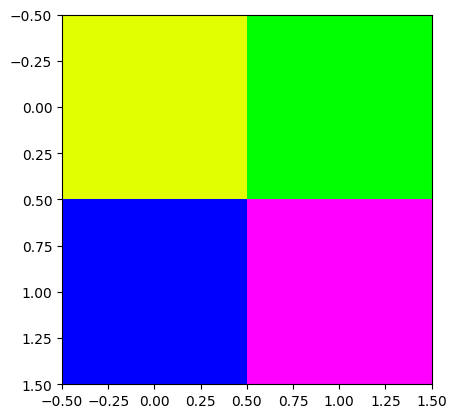

In [ ]:
b= torch.tensor([[225,255,0],[0,255,0],[0,0,255],[255,0,255],[70,80,75],[0,0,4],[60,100,255]])
B = b[torch.tensor([[0,1],[2,3]])]
print(B)
import matplotlib.pyplot as plt
plt.imshow(B)

# 인덱싱 연습문제

In [ ]:
a = torch.tensor([[1,2,3],[4,5,6]])

A = a[torch.tensor([[0,1],[1,1]])]
print(A)

# A와 동일한 결과를 리스트 인덱싱으로 만들어보자.

B = a[
    [[[0,0,0],[1,1,1]],[[1,1,1],[1,1,1]]],  #행
     [[[0,1,2],[0,1,2]],[[0,1,2],[0,1,2]]]  #열
    ]
print(B)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])


# 최종 비교 정리

In [ ]:
A = torch.tensor([[1,2,6],[3,4,7],[5,6,2],[7,8,9]])
print(A)
print(A.shape)

# 1. A[몇 행, 몇 열]
print(A[0,1])

#리스트 인덱싱 = 행 리스트와 열 리스트가 합쳐져서 하나가 된다!!!!!! => 무슨 shape을 따라가는지 주목하자.

# 2. A[[몇 행, 몇 행],[몇 열,몇 열]]
print(A[[0,2,3,1,2],[1,1,0,0,0]])

# 2-1. A[ [[몇 행, 몇 행],[몇 행, 몇 행]] , [[몇 열,몇 열],[몇 열, 몇 열]] ]
print(A[ [[0,2],[3,1]],[[0,2],[1,0]] ])


# 불리안 인덱싱
# 3. A[tensor(bool)] => A와 같은 shape을 가지는 tensor형 bool이 어디에 True를 가지고 있나.
print(A[torch.tensor([[True,True,True],[True,True,True],[True,True,True],[True,True,True]])])
print(A[A==2])

# 리스트 인덱싱 + 불리안 인덱싱
# 4. A[몇번째 값에 True가 있나, 몇번째 값에 True가 있나]
print(A[[True,False,False,False],[False,True,True]])
print(A[[0],[1,2]])

# tensor 인덱싱 => 몇번째 것을 교체투입할거냐
print(A[torch.tensor([1,1,2,2,2])])

tensor([[1, 2, 6],
        [3, 4, 7],
        [5, 6, 2],
        [7, 8, 9]])
torch.Size([4, 3])
tensor(2)
tensor([2, 6, 7, 3, 5])
tensor([[1, 2],
        [8, 3]])
tensor([1, 2, 6, 3, 4, 7, 5, 6, 2, 7, 8, 9])
tensor([2, 2])
tensor([2, 6])
tensor([2, 6])


# 파이토치의 여러 함수들

## 엄격한 규칙: 파이토치 함수들 안에는 torch.tensor 형태만 넣을 수 있다!!

In [ ]:
import torch
a=torch.randn(3,3) # normal의 n
b=torch.rand(3,3) # 이건 uniform
print(a)
print(b)

tensor([[-1.0054,  1.4954,  1.5113],
        [-0.2348, -0.3753,  0.7386],
        [ 0.1192,  2.0441,  2.1649]])
tensor([[0.6018, 0.3889, 0.6865],
        [0.4726, 0.0887, 0.1846],
        [0.7561, 0.0508, 0.8753]])


In [ ]:
a=torch.randn(3,3)
print(a)
print(torch.abs(a)) # 절댓값
print(torch.sqrt(torch.abs(a))) # 루트
print(torch.exp(a))
print(torch.log(torch.abs(a))) # 로그
print(torch.log(torch.exp(torch.tensor(1))))
print(torch.log10(torch.tensor(1000)))
print(torch.log2(torch.tensor(8)))
print(torch.round(a)) # 반올림
print(torch.round(a,decimals=2)) # 소수점 둘째자리까지
print(torch.floor(a)) # 내림
print(torch.ceil(a)) # 올림

tensor([[-0.1857,  3.2164,  0.7337],
        [-0.8639, -1.2318,  1.4844],
        [ 0.0416,  0.9250, -1.7199]])
tensor([[0.1857, 3.2164, 0.7337],
        [0.8639, 1.2318, 1.4844],
        [0.0416, 0.9250, 1.7199]])
tensor([[0.4309, 1.7934, 0.8566],
        [0.9295, 1.1099, 1.2184],
        [0.2039, 0.9618, 1.3115]])
tensor([[ 0.8306, 24.9377,  2.0828],
        [ 0.4215,  0.2918,  4.4125],
        [ 1.0424,  2.5219,  0.1791]])
tensor([[-1.6838,  1.1683, -0.3096],
        [-0.1463,  0.2085,  0.3950],
        [-3.1807, -0.0780,  0.5423]])
tensor(1.)
tensor(3.)
tensor(3.)
tensor([[-0.,  3.,  1.],
        [-1., -1.,  1.],
        [ 0.,  1., -2.]])
tensor([[-0.1900,  3.2200,  0.7300],
        [-0.8600, -1.2300,  1.4800],
        [ 0.0400,  0.9200, -1.7200]])
tensor([[-1.,  3.,  0.],
        [-1., -2.,  1.],
        [ 0.,  0., -2.]])
tensor([[-0.,  4.,  1.],
        [-0., -1.,  2.],
        [ 1.,  1., -1.]])


In [ ]:
type(torch.pi)

float

In [ ]:
print(torch.sin(torch.tensor(torch.pi/6)))
print(torch.sin(torch.tensor(torch.pi/2)))
print(torch.cos(torch.tensor(torch.pi/3)))
print(torch.cos(torch.tensor(torch.pi)))
print(torch.tanh(torch.tensor(-10)))

tensor(0.5000)
tensor(1.)
tensor(0.5000)
tensor(-1.)
tensor(-1.)


In [ ]:
type(torch.tensor(1)/6)

torch.Tensor

In [ ]:
torch.isnan # not a number
print(torch.log(torch.tensor(-1)))
print(torch.isnan(torch.tensor([1,2,torch.nan,3,4])))
print(torch.isinf(torch.tensor([1,2,torch.nan,4,torch.inf])))

tensor(nan)
tensor([False, False,  True, False, False])
tensor([False, False, False, False,  True])


In [ ]:
print("#1",end='\n')
a = torch.randn(3,4)
print(a)

print("#2",end='\n')
print(torch.max(a))

print("#3",end='\n')
print(torch.max(a,dim=0))

print("#4",end='\n')
print(torch.max(a,dim=1))

print("#5",end='\n')
print(torch.max(a,dim=0,keepdims=True))

print("#6",end='\n')
print(torch.max(a,dim=1,keepdims=True)) #3*1짜리 2D tensor

print("#7",end='\n')
print(torch.argmax(a))

print("#8",end='\n')
print(torch.argmax(a,dim=0))

print("#9",end='\n')
print(torch.argmax(a,dim=1))

#1
tensor([[ 0.2755, -0.9994, -0.4672,  0.3703],
        [ 0.2186, -0.4692, -0.2131, -1.4987],
        [ 1.5308,  1.0979, -0.4507, -0.8719]])
#2
tensor(1.5308)
#3
torch.return_types.max(
values=tensor([ 1.5308,  1.0979, -0.2131,  0.3703]),
indices=tensor([2, 2, 1, 0]))
#4
torch.return_types.max(
values=tensor([0.3703, 0.2186, 1.5308]),
indices=tensor([3, 0, 0]))
#5
torch.return_types.max(
values=tensor([[ 1.5308,  1.0979, -0.2131,  0.3703]]),
indices=tensor([[2, 2, 1, 0]]))
#6
torch.return_types.max(
values=tensor([[0.3703],
        [0.2186],
        [1.5308]]),
indices=tensor([[3],
        [0],
        [0]]))
#7
tensor(8)
#8
tensor([2, 2, 1, 0])
#9
tensor([3, 0, 0])


In [ ]:
a=torch.randn(6,1)
print(a)
print("======torch.sort=======") # torch라이브러리에서 sort 함수 사용
a_sorted = torch.sort(a,dim=0,descending=True)
print(a_sorted)

print("======a.sort=======") # a 인스턴스에서 sort 함수 사용
a_sorted = a.sort(dim=0,descending=True)
print(a_sorted)

tensor([[ 0.6082],
        [-0.2584],
        [ 0.1157],
        [-0.0025],
        [-0.8025],
        [-1.5824]])
======torch.sort=======
torch.return_types.sort(
values=tensor([[ 0.6082],
        [ 0.1157],
        [-0.0025],
        [-0.2584],
        [-0.8025],
        [-1.5824]]),
indices=tensor([[0],
        [2],
        [3],
        [1],
        [4],
        [5]]))
======a.sort=======
torch.return_types.sort(
values=tensor([[ 0.6082],
        [ 0.1157],
        [-0.0025],
        [-0.2584],
        [-0.8025],
        [-1.5824]]),
indices=tensor([[0],
        [2],
        [3],
        [1],
        [4],
        [5]]))


In [ ]:
print(torch.max(a))
print(a.max())

print(torch.abs(a))
print(a.abs())


tensor(0.6082)
tensor(0.6082)
tensor([[0.6082],
        [0.2584],
        [0.1157],
        [0.0025],
        [0.8025],
        [1.5824]])
tensor([[0.6082],
        [0.2584],
        [0.1157],
        [0.0025],
        [0.8025],
        [1.5824]])


In [10]:
a=torch.randn(3,4)
print(a)
print("==================")
print(a.sum(axis=0))
print(a.sum(axis=0,keepdim=True))
print("==================")
print(a.sum(axis=1))
print(a.sum(axis=1,keepdim=True))
print("==================")
print(torch.mean(a,axis=1,keepdim=True))
print(a.mean(axis=1,keepdim=True))

tensor([[-0.7511, -1.1419, -0.9377, -0.6555],
        [-2.7467,  0.0268, -1.2057,  0.4013],
        [ 1.6963,  0.4609,  1.7138, -1.5849]])
tensor([-1.8014, -0.6542, -0.4296, -1.8391])
tensor([[-1.8014, -0.6542, -0.4296, -1.8391]])
tensor([-3.4862, -3.5243,  2.2861])
tensor([[-3.4862],
        [-3.5243],
        [ 2.2861]])
tensor([[-0.8715],
        [-0.8811],
        [ 0.5715]])
tensor([[-0.8715],
        [-0.8811],
        [ 0.5715]])


In [21]:
# reshape
a= torch.randint(1,5,size=(12,))
# 1부터 5미만의 정수 , 1차원은 (n, )과 같이 표현
print(a)
print("=======================")
print(a.reshape(3,4))
print(a.reshape(3,-1)) # -1은 알아서 채워줘
print("=======================")
print(a.reshape(2,2,3))
print(a.reshape(2,2,3).ndim)

tensor([3, 2, 4, 1, 1, 3, 2, 3, 3, 2, 2, 3])
tensor([[3, 2, 4, 1],
        [1, 3, 2, 3],
        [3, 2, 2, 3]])
tensor([[3, 2, 4, 1],
        [1, 3, 2, 3],
        [3, 2, 2, 3]])
tensor([[[3, 2, 4],
         [1, 1, 3]],

        [[2, 3, 3],
         [2, 2, 3]]])
3


In [26]:
# reshape의 응용
a=torch.tensor([1,2,3])
b=torch.tensor([2,2,1])
# 내적 sol1)
print(torch.sum(a*b))
print("=================")
# 내적 sol2)
# 벡터는 열벡터가 기본이므로 열벡터로 만들어주기
a=a.reshape(3,1)
b=b.reshape(3,1)
print(a.T@b)
print(a.t()@b)

print(a.transpose(0,1)@b)
print(a.permute(1,0)@b)

tensor(9)
tensor([[9]])
tensor([[9]])
tensor([[9]])


In [38]:
a=torch.randn(4,3,6)
print(a.shape)
print(a.permute(2,0,1).shape)
print(a.transpose(2,1).shape) # transpose는 둘끼리 자리 바꾸기만 가능

torch.Size([4, 3, 6])
torch.Size([6, 4, 3])
torch.Size([4, 6, 3])


# PyTorch: Reshape(View) vs Permute(Transpose) 완벽 정리

2차원 행렬에서는 `reshape`과 `transpose`의 차이가 모호할 수 있으나, **3차원 이상에서는 데이터가 처리되는 방식이 완전히 다릅니다.**

## 1. 핵심 요약 (한 줄 정리)

| 구분 | 명령어 | 핵심 동작 원리 | 비유 |
| :--- | :--- | :--- | :--- |
| **Reshape** | `.reshape()`, `.view()` | 데이터를 **1줄로 쫙 편 다음(Flatten)**, 순서대로 다시 잘라서 채워 넣음. | **사과 상자:** 사과를 다 꺼내서 한 줄로 세운 뒤, 다른 크기의 상자에 순서대로 다시 담기. |
| **Permute** | `.permute()`, `.transpose()` | 데이터 값은 그대로 두고, **축(Axis)의 순서(주소)**만 바꿈. | **책장 정리:** 책의 내용은 그대로인데, '과학 코너'와 '역사 코너'의 위치를 통째로 바꿈. |

---

## 2. 3차원에서의 차이점 직관적 이해

**(2, 2, 3)** 형태의 텐서를 **(3, 2, 2)**로 바꿀 때 어떤 일이 일어나는가?

### A. Reshape (구조 파괴)
> "데이터의 물리적 순서를 유지하려다 보니, 의미가 섞인다."

1.  $(2, 2, 3)$ 텐서를 메모리 상에서 1차원 배열(길이 12)로 풉니다.
2.  앞에서부터 순서대로 잘라서 $(3, 2, 2)$ 틀에 억지로 끼워 넣습니다.
3.  **결과:** $R, G, B$ 픽셀 정보가 뒤죽박죽 섞여버립니다. (이미지 노이즈 발생)

### B. Permute (구조 유지)
> "데이터의 위치(인덱스) 규칙을 바꾼다."

1.  데이터를 1차원으로 풀지 않습니다.
2.  **인덱스(주소)의 순서**를 바꿉니다.
    * 기존: `Tensor[i][j][k]`
    * 변경: `Tensor[k][i][j]` (만약 `.permute(2, 0, 1)`을 했다면)
3.  **결과:** $R$ 채널은 $R$끼리, $G$는 $G$끼리 묶인 채로 차원의 순서만 변경됩니다.

---

## 3. Python 코드 예시

이 코드를 실행해보면 `reshape`이 데이터를 어떻게 섞어버리는지, `permute`가 어떻게 축을 교환하는지 명확히 알 수 있습니다.

```python
import torch

# (2, 2, 3) 텐서 생성
# 값의 의미: [0번째 덩어리, 1번째 행, 2번째 열] -> 012
x = torch.tensor([
    [[000, 001, 002],
     [010, 011, 012]],
    
    [[100, 101, 102],
     [110, 111, 112]]
])

print(f"원본 Shape: {x.shape}")
# 출력: torch.Size([2, 2, 3])

# ---------------------------------------------------------
# Case 1: Reshape (View) -> 의미 파괴
# ---------------------------------------------------------
# 12개의 숫자를 한 줄로 세운 뒤, 앞에서부터 끊어서 배치함
x_reshape = x.reshape(3, 2, 2)

print("\n=== Reshape 결과 (의미 섞임) ===")
print(x_reshape)
# 원본의 (0,0,2)에 있던 '002' 값이 뜬금없는 위치로 이동함.

# ---------------------------------------------------------
# Case 2: Permute -> 의미 유지 (축 교환)
# ---------------------------------------------------------
# (0번축, 1번축, 2번축) 순서를 -> (2번축, 0번축, 1번축) 순서로 변경
x_permute = x.permute(2, 0, 1)

print("\n=== Permute 결과 (의미 보존) ===")
print(x_permute)
# 원본의 '012' 값(인덱스 0,1,2)은 여기서 인덱스 (2,0,1) 위치에서 발견됨.
# 데이터가 섞이지 않고 차원만 회전함.
```

## 4. 실전 활용 (Computer Vision)

CV 분야에서 이 개념은 필수입니다. 라이브러리마다 이미지 포맷이 다르기 때문입니다.

* **PyTorch:** `(Channel, Height, Width)` $\rightarrow$ `(C, H, W)`
* **Matplotlib / OpenCV:** `(Height, Width, Channel)` $\rightarrow$ `(H, W, C)`

**이미지 시각화 할 때:**
PyTorch 텐서를 `plt.imshow()`로 그리려면, `reshape`이 아니라 반드시 **`permute(1, 2, 0)`**를 써서 `(H, W, C)`로 바꿔줘야 정상적인 그림이 나옵니다.

In [35]:
x = torch.tensor([
    [[0, 1, 2],
     [10, 11, 12]],

    [[100, 101, 102],
     [110, 111, 112]]
])
print(x)
x = x.permute(1,2,0)
print(x)

tensor([[[  0,   1,   2],
         [ 10,  11,  12]],

        [[100, 101, 102],
         [110, 111, 112]]])
tensor([[[  0, 100],
         [  1, 101],
         [  2, 102]],

        [[ 10, 110],
         [ 11, 111],
         [ 12, 112]]])


In [45]:
# :와 ...
x=torch.randn(2,3,4,5,6)
print(x.shape)
print("==================")
print(x[1,2,:,:,:].shape)
print(x[1,2,...].shape) # 위와 같은 의미
print("==================")
print(x[...,3].shape)
print(x[1,1,...,2].shape)
print(x[1,1,...,2])

torch.Size([2, 3, 4, 5, 6])
torch.Size([4, 5, 6])
torch.Size([4, 5, 6])
torch.Size([2, 3, 4, 5])
torch.Size([4, 5])
tensor([[ 0.6908,  1.9506,  1.5392,  0.5119, -0.4191],
        [-2.6318, -0.3726,  0.8262,  0.0895,  0.4527],
        [ 0.1750,  0.3060, -0.3529, -0.2931,  0.8611],
        [-0.3409, -0.2972, -2.1388,  1.0565,  1.0503]])


In [49]:
a=torch.randn(2,3,4)
print(a)
print(a.shape)
print(a[:,1,:])
print(a[:,1,:].shape)

tensor([[[-3.0398,  1.0868,  0.4214, -0.7843],
         [-0.5671,  0.5987,  0.9501, -0.5426],
         [-0.8413,  0.0946, -1.4603,  1.2323]],

        [[-0.1307,  0.3309, -0.8102,  0.7373],
         [ 0.6615, -0.5942,  0.9128, -0.7104],
         [ 0.6831,  1.6327, -0.7188,  1.4635]]])
torch.Size([2, 3, 4])
tensor([[-0.5671,  0.5987,  0.9501, -0.5426],
        [ 0.6615, -0.5942,  0.9128, -0.7104]])
torch.Size([2, 4])


In [52]:
# concatenation
a=torch.ones(3,4)
b=torch.zeros(3,4)
c=torch.vstack([a,b]) #v = 0dim요소들끼리
d=torch.hstack([a,b]) #h = 1dim요소들끼리
e=torch.cat([a,b],dim=0) #0dim요소들끼리
f=torch.cat([a,b],dim=1) #1dim요소들끼리

print(c)
print(e)
print(d)
print(f)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])


In [60]:
# squeeze
# 쓸모없는 1짜리 차원을 없애줌

a = torch.randn(1,1,1,3,1,1,1,4,1,1,1)
print(a.shape)
print(a.squeeze().shape)
print(a.squeeze(dim=[0,1,2]).shape)

torch.Size([1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1])
torch.Size([3, 4])
torch.Size([3, 1, 1, 1, 4, 1, 1, 1])


In [65]:
# unsqueeze
# 1짜리 차원을 늘려줌
a=torch.randn(3,4)
print(a.unsqueeze(0).shape)
print(a.reshape(1,3,4).shape)

print(a.unsqueeze(1).shape)
print(a.reshape(3,1,4).shape)

print(a.unsqueeze(2).shape)
print(a.reshape(3,4,1).shape)

torch.Size([1, 3, 4])
torch.Size([1, 3, 4])
torch.Size([3, 1, 4])
torch.Size([3, 1, 4])
torch.Size([3, 4, 1])
torch.Size([3, 4, 1])


In [73]:
# unsqueeze의 유용한 활용처
a=torch.ones(3,4)
b=torch.zeros(3,4)
print(a)
print(b)
print("==========================")
aa=a.unsqueeze(0)
bb=b.unsqueeze(0)
print(aa)
print(bb)
print("==========================")
c=torch.cat([aa,bb],axis=0)
print(c)
print("==========================")
d=torch.stack([a,b],axis=0)

# 차원을 추가해서 쌓는 방식이다보니,
# stack은 a,b의 shape이 완전히 일치해야함.
# concat은 달라도 쌓을 차원 이외의 차원들만 일치하면 됨.

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


### ② `cat` vs `stack` 비교

두 방식의 결과물은 완전히 동일합니다.

1.  **`unsqueeze` + `cat` 방식 (수동 구현)**
    * 각각 3차원으로 만든 뒤(`1, 3, 4`), 0번 축을 따라 이어 붙입니다.
    * 결과: `(1+1, 3, 4)` = `(2, 3, 4)`
2.  **`stack` 방식 (자동 구현)**
    * 2차원 데이터(`3, 4`)를 새로운 차원을 생성하며 쌓아 올립니다.
    * 결과: `(2, 3, 4)`

> **결론:** `torch.stack`은 사용자의 편의를 위해 `unsqueeze`와 `cat` 과정을 한 번에 처리해 주는 함수입니다.

---

## 2. 실전 활용: `unsqueeze`는 언제 쓰는가?

AI 모델링(특히 CV, NLP)에서 `unsqueeze`는 필수적으로 사용됩니다. 가장 대표적인 사례는 **"배치 차원(Batch Dimension) 추가"**입니다.

### 상황: 이미지 1장을 모델에 넣을 때
PyTorch의 모델(CNN, ResNet 등)은 입력 데이터가 **반드시 4차원**이어야 합니다.

* **모델이 기대하는 형태:** `(Batch, Channel, Height, Width)`
* **내가 가진 이미지:** `(Channel, Height, Width)`

이때 `unsqueeze`를 사용하여 가짜 차원(Batch=1)을 만들어줍니다.

```python
# 내 이미지 (3채널, 224x224)
my_image = torch.randn(3, 224, 224)

# [Error 발생] 모델은 4차원을 원함
# model(my_image)

# [해결] 0번 축(맨 앞)에 차원 추가 -> (1, 3, 224, 224)
input_batch = my_image.unsqueeze(0)

# [성공] 모델이 "아, 1장짜리 묶음이구나" 하고 인식함
output = model(input_batch)
```

## 3. 요약

| 함수 | 역할 | 비유 |
| :--- | :--- | :--- |
| **`unsqueeze(dim)`** | 해당 위치에 크기 1인 차원 생성 | 낱장을 파일 홀더에 넣기 |
| **`cat`** | 기존 차원을 따라 연결 | 기차 연결하기 |
| **`stack`** | 새로운 차원을 만들어 쌓기 | 샌드위치 쌓기 |



---



---


# 딥러닝 기초: 배치(Batch)란 무엇인가?

딥러닝 입문자가 가장 많이 헷갈리는 '차원' 개념, 그중에서도 **배치(Batch)**에 대한 핵심 정리입니다.

## 1. 직관적 이해: "한 번에 처리하는 묶음"

**비유: 군대 식판 닦기**
* **Batch 안 쓸 때 (Batch Size = 1):**
    취사병이 훈련병 1명이 밥 다 먹을 때까지 기다렸다가, 식판 1개를 닦고, 다음 사람을 기다림. $\rightarrow$ **매우 느리고 비효율적**
* **Batch 쓸 때 (Batch Size = 32):**
    식판 32개가 모일 때까지 기다렸다가, **한 번에** 32개를 세척기에 넣고 돌림. $\rightarrow$ **고효율 (병렬 처리)**

> **Batch Size:** 한 번에 묶어서 처리하는 데이터의 개수 (예: 16, 32, 64, 128...)

---

## 2. 왜 사용하는가? (GPU의 특성)

컴퓨터(GPU)는 거대한 공장 기계와 같습니다. 기계를 한 번 돌릴 때마다 비용(연산)이 발생하는데, 고작 데이터 1개만 넣으면 손해입니다.
그래서 AI 모델은 설계될 때부터 **"데이터를 묶음(Batch) 단위로 넣어라"**라고 규칙이 정해져 있습니다.

## 3. 차원으로 보는 Batch (3차원 → 4차원)

이미지 데이터를 예로 들면, 배치가 추가됨으로써 맨 앞에 차원이 하나 늘어납니다.

* **이미지 1장 (Raw Data):** `(Channel, Height, Width)`
* **배치 (Input Data):** `(Batch_Size, Channel, Height, Width)`

### 차원 변화 예시
* **사과 1개:** `(3, 100, 100)`
* **사과 32개 묶음:** `(32, 3, 100, 100)`
* **맨 앞의 숫자(N)**가 바로 묶음의 크기입니다.

---

## 4. `unsqueeze(0)`가 필요한 이유

우리가 실습할 때 이미지 1장만 가지고 있더라도, 모델(기계)은 **"무조건 묶음 단위"**만 받습니다. 사과 1개를 그냥 투입구에 던지면 "형식이 맞지 않습니다"라며 에러가 납니다.

따라서 **"이것은 1개짜리 묶음입니다"**라고 포장(차원 추가)을 해줘야 합니다.

```python
# 내 손에 있는 것 (사과 1개)
img = torch.randn(3, 100, 100)
# -> 기계에 넣으면 "차원 부족" 에러 발생

# 포장지 씌우기 (1개짜리 박스 만들기)
img_batch = img.unsqueeze(0)

# -> Shape 결과: (1, 3, 100, 100)
# -> 기계의 반응: "아, 1개짜리 묶음(Batch Size=1)이구나. 통과!"
```

## 요약
1.  **Batch**: 효율성을 위해 데이터를 묶어서 처리하는 단위.
2.  **Model**: 무조건 Batch 차원(맨 앞, 0번 축)이 포함된 4차원 입력을 원함.
3.  **unsqueeze(0)**: 데이터가 1개일 때, 강제로 배치 차원을 만들어주기 위해(포장하기 위해) 사용.

In [75]:
# clone의 필요성
a = torch.tensor([[1,2],[3,4]])
b = a     # 주소까지 가져와서 일심동체
b[0,0]=10000
print(a)  # a도 바뀜

tensor([[10000,     2],
        [    3,     4]])


In [77]:
# clone 사용
a = torch.tensor([[1,2],[3,4]])
b = a.clone()
b[0,0]=10000
print(a)

tensor([[1, 2],
        [3, 4]])


# PyTorch: 행렬 곱(@)의 3가지 동작 방식

`@` 연산자(`torch.matmul`)는 입력된 텐서의 차원에 따라 '스마트하게' 동작합니다. 이 규칙은 Transformer나 CNN 내부 연산의 기초가 됩니다.

## 1. 차원별 동작 원리

| 케이스 | 입력 A Shape | 입력 B Shape | 결과 Shape | 동작 설명 |
| :--- | :--- | :--- | :--- | :--- |
| **기본 (2D)** | $(5, \mathbf{7})$ | $(\mathbf{7}, 10)$ | $(5, 10)$ | 일반적인 행렬 곱셈. 안쪽 차원($7$) 소거. |
| **배치 (3D)** | $(\mathbf{32}, 5, 7)$ | $(\mathbf{32}, 7, 10)$ | $(\mathbf{32}, 5, 10)$ | **끼리끼리 연산.** 배치($32$)별로 독립적으로 행렬 곱 수행. |
| **브로드캐스팅** | $(\mathbf{32}, 5, 7)$ | $(7, 10)$ | $(\mathbf{32}, 5, 10)$ | **공유 연산.** 하나의 $B$ 행렬이 $A$의 모든 배치($32$)에 동일하게 적용됨. |

## 2. 코드 예시 및 해석

```python
import torch

# 1. Standard MatMul (단일 연산)
a = torch.randn(5, 7)
b = torch.randn(7, 10)
print( (a@b).shape )
# >> torch.Size([5, 10])

# 2. Batch MatMul (개별 연산)
# 상황: 32개의 데이터가 각각 서로 다른 변환 행렬과 곱해질 때
a = torch.randn(32, 5, 7)
b = torch.randn(32, 7, 10)
print( (a@b).shape )
# >> torch.Size([32, 5, 10])

# 3. Broadcasting (공유 연산) - 중요!
# 상황: 32개의 데이터(Batch)가 하나의 가중치(Weight)를 공유할 때 (예: nn.Linear)
a = torch.randn(32, 5, 7)
b = torch.randn(7, 10)    # 배치 차원 없음
print( (a@b).shape )
# >> torch.Size([32, 5, 10])
# b가 자동으로 (32, 7, 10)인 것처럼 행동함
```

> **Tip:** `@` 연산 시 `RuntimeError`가 발생한다면 99% 확률로 **"안쪽 차원(Inner Dimension)"**이 맞지 않아서입니다. (위 예시에서는 `7`에 해당)

In [81]:
# @ 내적
a = torch.randn(5,7)
b = torch.randn(7,10)
c = a@b
print(c.shape)

a = torch.randn(32,5,7)
b = torch.randn(32,7,10)
c = a@b
print(c.shape)

a = torch.randn(32,5,7)
b = torch.randn(7,10)
c = a@b
print(c.shape)

torch.Size([5, 10])
torch.Size([32, 5, 10])
torch.Size([32, 5, 10])


In [85]:
# numpy <-> torch 왔다갔다 기능
import numpy as np
import torch

a = np.array([1,2,3])
b = torch.tensor([1,2,3])
A = torch.tensor(a)  # A=torch.from_numpy(a)
B = np.array(b) # B=b.numpy()
print(type(A))
print(type(B))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
